## 1. Choosing Dataset
From Kaggle Dataset "Housing Prices Dataset", URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data?select=Housing.csv

In [6]:
import sys
print(sys.executable)


c:\Users\56932\Documents\GitHub\Project-001_House-Price-Prediction_Easy\.venv\Scripts\python.exe


In [46]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


3.0.0
2.4.2
0.13.2


In [9]:
# read dataset
df = pd.read_csv('../Datasets/Housing.csv')

We want to predict the house price (x) our dependent variable based on the other attributes, such as, number of bedrooms, badthroom, are in square meters, etc.

## 2. EDA

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.shape

(545, 13)

In [ ]:
# number of records per columns, type of data, and memory usage
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    str  
 6   guestroom         545 non-null    str  
 7   basement          545 non-null    str  
 8   hotwaterheating   545 non-null    str  
 9   airconditioning   545 non-null    str  
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    str  
 12  furnishingstatus  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB


In [ ]:
#  statistical summary of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# list of columns in the dataset
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [19]:
# check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [20]:
# check for unique values per column
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
# check for duplicate records
df.duplicated().sum()


np.int64(0)

In [50]:
# check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# check unique values in categorical columns
cat_columns = df.select_dtypes(include=['object','category']).columns

for col in cat_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in column 'mainroad':
<StringArray>
['yes', 'no']
Length: 2, dtype: str


Unique values in column 'guestroom':
<StringArray>
['no', 'yes']
Length: 2, dtype: str


Unique values in column 'basement':
<StringArray>
['no', 'yes']
Length: 2, dtype: str


Unique values in column 'hotwaterheating':
<StringArray>
['no', 'yes']
Length: 2, dtype: str


Unique values in column 'airconditioning':
<StringArray>
['yes', 'no']
Length: 2, dtype: str


Unique values in column 'prefarea':
<StringArray>
['yes', 'no']
Length: 2, dtype: str


Unique values in column 'furnishingstatus':
<StringArray>
['furnished', 'semi-furnished', 'unfurnished']
Length: 3, dtype: str




C:\Users\56932\AppData\Local\Temp\ipykernel_9980\878714985.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_columns = df.select_dtypes(include=['object','category']).columns


At this stage we do not need to do data reduction

# Visualization

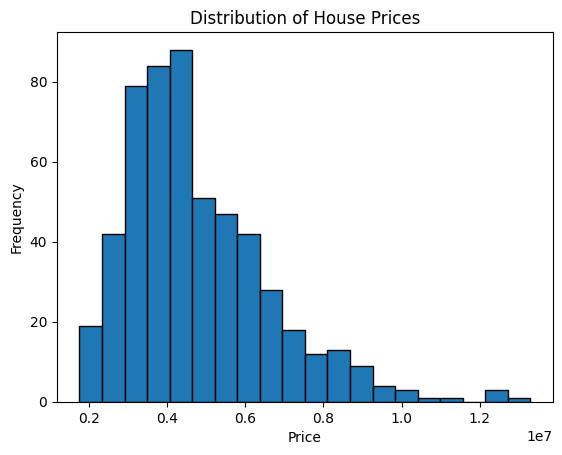

In [31]:
prices = df['price']

plt.hist(prices, bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

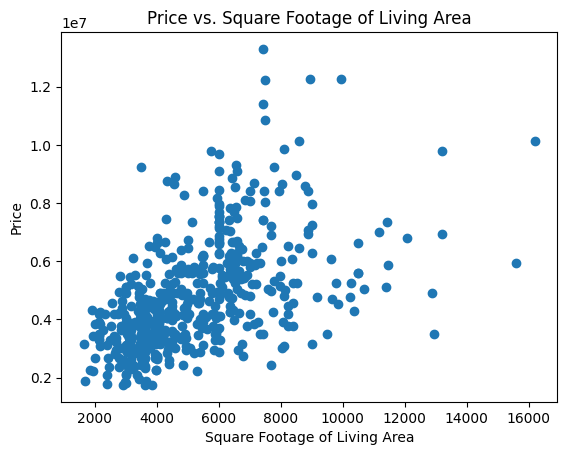

In [ ]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Price vs. Square Footage of Living Area')
plt.show()

C:\Users\56932\AppData\Local\Temp\ipykernel_9980\4078245154.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


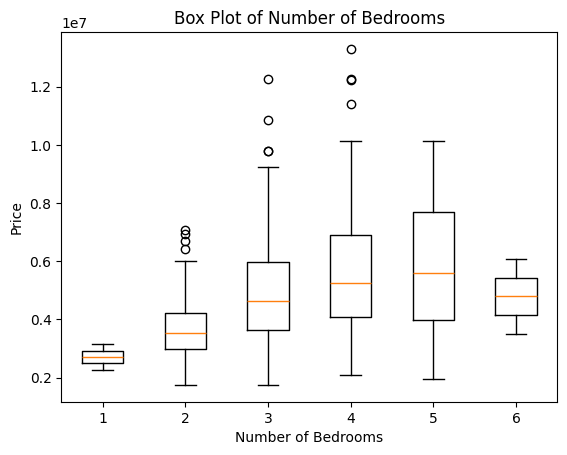

In [44]:
tmp = df[["bedrooms", "price"]].dropna()

groups = tmp.groupby("bedrooms")["price"]
labels = sorted(groups.groups.keys())
data = [groups.get_group(b).to_numpy() for b in labels]

plt.boxplot(data, labels=labels, showfliers=True)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Number of Bedrooms')
plt.show()

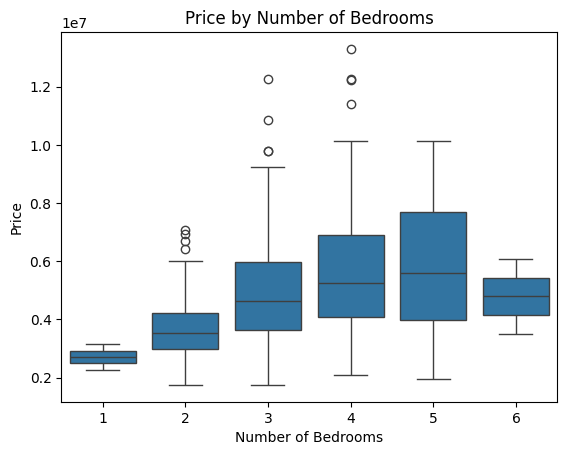

In [47]:
# easier with seaborn
sns.boxplot(data=df, x="bedrooms", y="price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price by Number of Bedrooms")
plt.show()